# Plot Graph

Teste da classe de grafos, criando uma solução aleatória e plotando o grafo de peter san
Solução =  [2 1 0 3 2 2 4 3 3 0]
Número de cores= 5
Número de violações= 3
Custo =  35


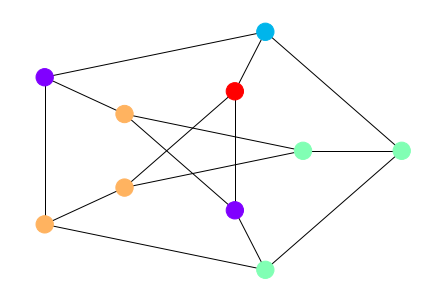

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class ProblemaColoracaoGrafo:
    def __init__(self, grafo, penalidadeRestricaoRigida):
        self.grafo = grafo
        self.penalidadeRestricaoRigida = penalidadeRestricaoRigida
        self. ListaNodes = list (self.grafo.nodes)
        self.MatrizAdj = nx.adjacency_matrix(grafo).todense()

    def __len__(self):
        return nx.number_of_nodes (self.grafo)

    def calculoCusto(self, arranjoCores):
        return self.numerodeCores(arranjoCores) + \
            self.penalidadeRestricaoRigida*self.quantidadeViolacoes(arranjoCores)

    def quantidadeViolacoes (self, arranjoCores):
        violacoes = 0
        for i in range (len (arranjoCores)):
            for j in range(i+1, len(arranjoCores)): 
                if self.MatrizAdj[i, j]:  # se vertice i e j forem conexos, faça:
                    if arranjoCores[i] == arranjoCores [j]: 
                        violacoes += 1
                        
        return violacoes

    def numerodeCores (self, arranjoCores):
        return len(set(arranjoCores))

    def plotarGrafo(self, arranjoCores):
        listadeCores = list(set(arranjoCores))
        cores = plt.cm.rainbow(np.linspace(0, 1, len(listadeCores)))
        mapadeCores = []
        for i in range (self.__len__()):
            cor = cores[listadeCores.index (arranjoCores[i])]
            mapadeCores.append(cor)

        pos = nx. shell_layout (self.grafo, nlist=[range (5, 10), range(5)], rotate=0)
        nx.draw(self.grafo, pos, 
                font_weight='bold',
                node_color= mapadeCores, cmap=cores)

        return plt

def main1():
    gcp = ProblemaColoracaoGrafo(nx.petersen_graph(), 10)
    solution = np.random.randint(5, size=len(gcp))
    print("Teste da classe de grafos, criando uma solução aleatória e plotando o grafo de peter san")
    print("Solução = ", solution)
    print("Número de cores=", gcp.numerodeCores (solution))
    print("Número de violações=", gcp.quantidadeViolacoes (solution))
    print("Custo = ", gcp.calculoCusto(solution))
    plot = gcp.plotarGrafo(solution)
    plot.show()

if __name__ == '__main__':
    main1()

# Algorithm

[post explaining how to do it](https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/)

In [2]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# constantes do problema:

HARD_CONSTRAINT_PENALTY = 10 # o fator de penalidade para i
MAX_COLORS = 10

gcp = ProblemaColoracaoGrafo(nx.petersen_graph(), HARD_CONSTRAINT_PENALTY)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("individual", list, fitness=creator.FitnessMin)
toolbox.register("integers", random.randint, 0, MAX_COLORS - 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individualCreator)

def getCost(individual):
    return gcp.calculoCusto(individual),

toolbox.register("evaluate", getCost)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=MAX_COLORS, indpb=0.05)

In [8]:
if __name__ == "__main__":
    random.seed(0)

    POPULATION_SIZE = 100
    P_CROSSOVER = 0.9
    P_MUTATION = 0.1
    MAX_GENERATIONS = 100
    HALL_OF_FAME_SIZE = 1
    
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, log = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=P_CROSSOVER, 
        mutpb=P_MUTATION, 
        ngen=MAX_GENERATIONS, 
        stats=stats,
        halloffame=hof, 
        verbose=True)
    
    print(pop)

    gen = log.select('gen')
    best_per_gen = log.select('min')
    
    # fig, ax = plt.subplots()
    # ax.plot(gen, best_per_gen)
    # ax.grid()
    # ax.set(xlabel="Gerações", ylabel="Melhor Fitness")
    # plt.show()

TypeError: initRepeat() missing 1 required positional argument: 'n'